In [1]:
from database.comet import Comet
from modeler.modeler import Modeler as m
import pandas as pd
import matplotlib.pyplot as plt
from processor.processor import Processor as p
import matplotlib
from datetime import datetime, timedelta
from statistics import mean
from tqdm import tqdm

In [2]:
comet = Comet()

In [3]:
comet.connect()
prices = comet.retrieve("alpha_prices")
comet.disconnect()

In [4]:
prices

,date,open,high,low,close,volume,market_cap,crypto
0,2022-01-09,1.1820,1.1850,1.1720,1.1820,3844276.90000000,3844276.90000000,ADA
1,2022-01-08,1.2090,1.2540,1.1240,1.1810,169730473.68000001,169730473.68000001,ADA
2,2022-01-07,1.2790,1.2850,1.1890,1.2100,209806013.19999999,209806013.19999999,ADA
3,2022-01-06,1.2300,1.2970,1.1860,1.2800,175754407.59999999,175754407.59999999,ADA
4,2022-01-05,1.3100,1.3530,1.1930,1.2300,158740088.19999999,158740088.19999999,ADA
...,...,...,...,...,...,...,...,...
8816,2020-08-22,2.8387,4.5500,2.7820,4.4546,41611476.51000000,41611476.51000000,DOT
8817,2020-08-21,2.8978,3.0900,2.6826,2.8330,9765153.74000000,9765153.74000000,DOT
8818,2020-08-20,2.9449,3.1111,2.6000,2.9000,11040863.60000000,11040863.60000000,DOT
8819,2020-08-19,3.1000,3.1999,2.6400,2.9500,15895774.92000000,15895774.92000000,DOT


In [5]:
market = prices.pivot_table(index="date",columns="crypto",values="close").reset_index()
market = p.column_date_processing(market)
market = market.fillna(method="ffill").dropna()
symbols = [x.lower() for x in ['ADA', 'BTC', 'DOGE', 'ETH', 'SHIB', 'LUNA',
       'AVAX', 'LTC', 'DOT',"date"]]
market = market[symbols]

In [6]:
market

crypto,ada,btc,doge,eth,shib,luna,avax,ltc,dot,date
755,1.6423,55816.14,0.45074,3945.88,0.000035,15.850,34.652,358.89,36.488,2021-05-10
756,1.7632,56670.02,0.49326,4173.45,0.000030,16.310,36.800,377.60,38.637,2021-05-11
757,1.5694,49631.32,0.39160,3823.21,0.000018,14.619,32.800,310.40,35.128,2021-05-12
758,1.9296,49670.97,0.48945,3717.91,0.000021,15.911,35.075,317.95,39.988,2021-05-13
759,2.0069,49841.45,0.55971,4075.01,0.000018,16.403,36.999,326.23,47.979,2021-05-14
...,...,...,...,...,...,...,...,...,...,...
995,1.2300,43451.13,0.15900,3540.63,0.000030,78.470,97.420,135.40,26.720,2022-01-05
996,1.2800,43082.31,0.15990,3406.81,0.000031,78.410,95.110,135.90,26.720,2022-01-06
997,1.2100,41566.48,0.15500,3199.24,0.000029,68.800,86.740,131.40,24.900,2022-01-07
998,1.1810,41679.74,0.15090,3080.95,0.000028,66.960,83.900,129.40,23.990,2022-01-08


In [7]:
market

crypto,ada,btc,doge,eth,shib,luna,avax,ltc,dot,date
755,1.6423,55816.14,0.45074,3945.88,0.000035,15.850,34.652,358.89,36.488,2021-05-10
756,1.7632,56670.02,0.49326,4173.45,0.000030,16.310,36.800,377.60,38.637,2021-05-11
757,1.5694,49631.32,0.39160,3823.21,0.000018,14.619,32.800,310.40,35.128,2021-05-12
758,1.9296,49670.97,0.48945,3717.91,0.000021,15.911,35.075,317.95,39.988,2021-05-13
759,2.0069,49841.45,0.55971,4075.01,0.000018,16.403,36.999,326.23,47.979,2021-05-14
...,...,...,...,...,...,...,...,...,...,...
995,1.2300,43451.13,0.15900,3540.63,0.000030,78.470,97.420,135.40,26.720,2022-01-05
996,1.2800,43082.31,0.15990,3406.81,0.000031,78.410,95.110,135.90,26.720,2022-01-06
997,1.2100,41566.48,0.15500,3199.24,0.000029,68.800,86.740,131.40,24.900,2022-01-07
998,1.1810,41679.74,0.15090,3080.95,0.000028,66.960,83.900,129.40,23.990,2022-01-08


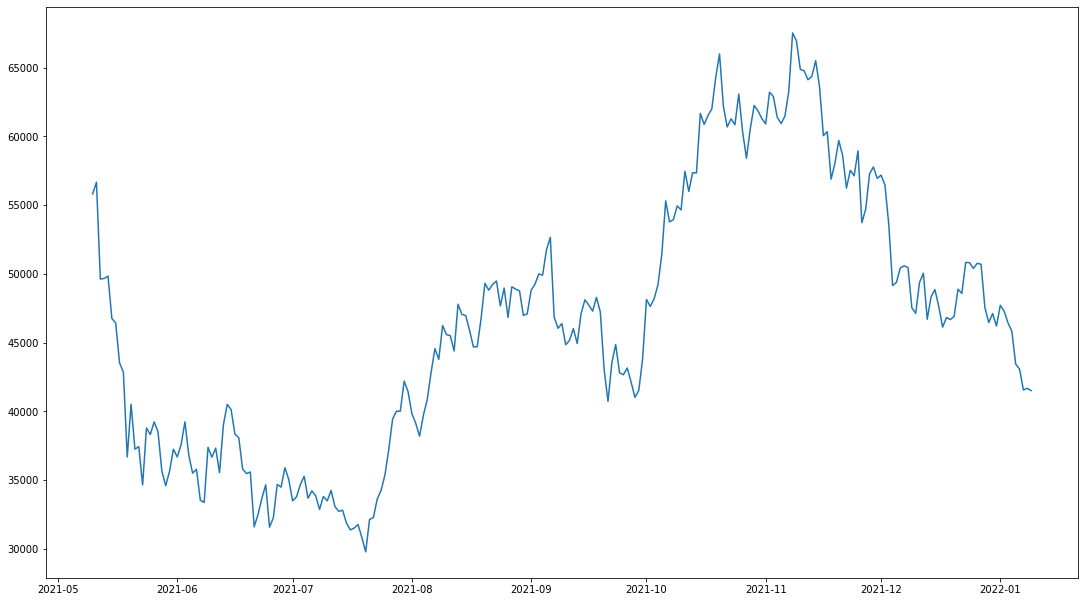

In [8]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(market["date"],market["btc"])

In [11]:
training_start = datetime(2021,5,1)
training_end = datetime(2021,10,1)
information_days = 8
sims = []
for symbol in tqdm(symbols):
    try:
        print(symbol)
        symbol_data = market[["date",symbol]]
        symbol_data.sort_values("date",inplace=True)
        for i in range(1,information_days):
            symbol_data[str(i)] = symbol_data[symbol].shift(i)
        symbol_data["p1"] = symbol_data[symbol].pct_change(7)
        symbol_data["p2"] = symbol_data["p1"].pct_change(7)
        symbol_data["p3"] = symbol_data["p2"].pct_change(7)
        symbol_data.dropna(inplace=True)
        symbol_data.rename(columns={symbol:"y"},inplace=True)
        training_data = symbol_data[(symbol_data["date"]>=training_start) & (symbol_data["date"]<training_end)]
        training_data.reset_index(inplace=True,drop=True)
        prediction_data = symbol_data[(symbol_data["date"]>training_end)]
        factors = [str(i) for i in range(1,information_days)]
        factors.extend(["p1","p2","p3"])
        refined = {"X":training_data[factors],"y":training_data[["y"]]}
        models = m.regression(refined)
        for row in models.iterrows():
            sim = prediction_data 
            current_model = row[1]["model"]
            api = row[1]["api"]
            score = row[1]["score"]
            if score > 0.7:
                predictions = current_model.predict(prediction_data[factors])
                sim[f'{api}_prediction'] = predictions
        sim["prediction"] = [mean(row[1][column] for column in [x for x in sim.columns if "prediction" in x]) for row in sim.iterrows()]
        sim["symbol"] = symbol
        sims.append(sim)
    except Exception as e:
        print(str(e))

  0%|                                 | 0/10 [00:00<?, ?it/s]

ada


 10%|██▌                      | 1/10 [00:04<00:39,  4.35s/it]

[16:53:07] C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/data/data.cc:981: Check failed: valid: Input data contains `inf` or `nan`
btc


 20%|█████                    | 2/10 [00:09<00:36,  4.54s/it]

doge


 30%|███████▌                 | 3/10 [00:13<00:32,  4.60s/it]

eth


 40%|██████████               | 4/10 [00:18<00:28,  4.69s/it]

shib


 50%|████████████▌            | 5/10 [00:22<00:22,  4.59s/it]

mean requires at least one data point
luna


 60%|███████████████          | 6/10 [00:27<00:18,  4.55s/it]

avax


 70%|█████████████████▌       | 7/10 [00:31<00:13,  4.53s/it]

ltc


 80%|████████████████████     | 8/10 [00:36<00:09,  4.52s/it]

dot


100%|████████████████████████| 10/10 [00:40<00:00,  4.08s/it]

date
The column label 'date' is not unique.


In [12]:
sim

crypto,date,y,1,2,3,4,5,6,7,p1,p2,p3,xgb_prediction,cat_prediction,prediction,symbol
900,2021-10-02,32.01,31.94,28.62,27.28,26.31,27.71,28.84,29.82,0.073441,-1.507104,-0.368218,30.861774,31.749499,31.305637,dot
901,2021-10-03,32.11,32.01,31.94,28.62,27.28,26.31,27.71,28.84,0.113384,-1.766079,-2.020572,31.092924,31.402568,31.247746,dot
902,2021-10-04,31.15,32.11,32.01,31.94,28.62,27.28,26.31,27.71,0.124143,-6.857476,6.731765,30.960112,34.055489,32.507800,dot
903,2021-10-05,31.39,31.15,32.11,32.01,31.94,28.62,27.28,26.31,0.193082,-64.693082,64.367946,31.073780,34.578388,32.826084,dot
904,2021-10-06,32.19,31.39,31.15,32.11,32.01,31.94,28.62,27.28,0.179985,-2.316559,-98.446961,31.907442,31.076460,31.491951,dot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-01-05,26.72,28.69,30.11,29.69,28.60,26.66,27.54,26.82,-0.003729,-0.746271,-0.875316,27.621222,28.997404,28.309313,dot
996,2022-01-06,26.72,26.72,28.69,30.11,29.69,28.60,26.66,27.54,-0.029775,-0.464052,-0.682236,26.896257,28.450050,27.673154,dot
997,2022-01-07,24.90,26.72,26.72,28.69,30.11,29.69,28.60,26.66,-0.066017,0.255206,-1.186246,26.153481,26.093828,26.123654,dot
998,2022-01-08,23.99,24.90,26.72,26.72,28.69,30.11,29.69,28.60,-0.161189,18.369522,-18.275629,25.007008,26.064796,25.535902,dot


In [13]:
final = pd.concat(sims)

In [14]:
final["symbol"].unique()

array(['btc', 'doge', 'eth', 'luna', 'avax', 'ltc', 'dot'], dtype=object)

In [15]:
final

crypto,date,y,1,2,3,4,5,6,7,p1,p2,p3,xgb_prediction,cat_prediction,prediction,symbol
900,2021-10-02,47634.90,48141.61,43824.10,41524.28,41026.54,42147.35,43160.90,42670.64,0.116339,-1.999329,-0.255672,44539.808594,47204.308960,45872.058777,btc
901,2021-10-03,48200.01,47634.90,48141.61,43824.10,41524.28,41026.54,42147.35,43160.90,0.116752,-2.351570,-0.449045,46556.894531,46582.708505,46569.801518,btc
902,2021-10-04,49224.94,48200.01,47634.90,48141.61,43824.10,41524.28,41026.54,42147.35,0.167925,-9.319295,16.623763,49110.035156,46633.625568,47871.830362,btc
903,2021-10-05,51471.99,49224.94,48200.01,47634.90,48141.61,43824.10,41524.28,41026.54,0.254602,34.497896,-33.761972,52373.281250,47364.007229,49868.644240,btc
904,2021-10-06,55315.00,51471.99,49224.94,48200.01,47634.90,48141.61,43824.10,41524.28,0.332112,-8.161466,14.924456,53479.195312,48900.729339,51189.962326,btc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-01-05,26.72,28.69,30.11,29.69,28.60,26.66,27.54,26.82,-0.003729,-0.746271,-0.875316,27.621222,28.997404,28.309313,dot
996,2022-01-06,26.72,26.72,28.69,30.11,29.69,28.60,26.66,27.54,-0.029775,-0.464052,-0.682236,26.896257,28.450050,27.673154,dot
997,2022-01-07,24.90,26.72,26.72,28.69,30.11,29.69,28.60,26.66,-0.066017,0.255206,-1.186246,26.153481,26.093828,26.123654,dot
998,2022-01-08,23.99,24.90,26.72,26.72,28.69,30.11,29.69,28.60,-0.161189,18.369522,-18.275629,25.007008,26.064796,25.535902,dot


In [16]:
prices = p.column_date_processing(prices)

In [17]:
final.rename(columns={"y":"close"},inplace=True,errors="ignore")

In [18]:
final["signal"] = (final["prediction"] - final["close"]) / final["close"]

In [19]:
final

crypto,date,close,1,2,3,4,5,6,7,p1,p2,p3,xgb_prediction,cat_prediction,prediction,symbol,signal
900,2021-10-02,47634.90,48141.61,43824.10,41524.28,41026.54,42147.35,43160.90,42670.64,0.116339,-1.999329,-0.255672,44539.808594,47204.308960,45872.058777,btc,-0.037007
901,2021-10-03,48200.01,47634.90,48141.61,43824.10,41524.28,41026.54,42147.35,43160.90,0.116752,-2.351570,-0.449045,46556.894531,46582.708505,46569.801518,btc,-0.033822
902,2021-10-04,49224.94,48200.01,47634.90,48141.61,43824.10,41524.28,41026.54,42147.35,0.167925,-9.319295,16.623763,49110.035156,46633.625568,47871.830362,btc,-0.027488
903,2021-10-05,51471.99,49224.94,48200.01,47634.90,48141.61,43824.10,41524.28,41026.54,0.254602,34.497896,-33.761972,52373.281250,47364.007229,49868.644240,btc,-0.031150
904,2021-10-06,55315.00,51471.99,49224.94,48200.01,47634.90,48141.61,43824.10,41524.28,0.332112,-8.161466,14.924456,53479.195312,48900.729339,51189.962326,btc,-0.074574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-01-05,26.72,28.69,30.11,29.69,28.60,26.66,27.54,26.82,-0.003729,-0.746271,-0.875316,27.621222,28.997404,28.309313,dot,0.059480
996,2022-01-06,26.72,26.72,28.69,30.11,29.69,28.60,26.66,27.54,-0.029775,-0.464052,-0.682236,26.896257,28.450050,27.673154,dot,0.035672
997,2022-01-07,24.90,26.72,26.72,28.69,30.11,29.69,28.60,26.66,-0.066017,0.255206,-1.186246,26.153481,26.093828,26.123654,dot,0.049143
998,2022-01-08,23.99,24.90,26.72,26.72,28.69,30.11,29.69,28.60,-0.161189,18.369522,-18.275629,25.007008,26.064796,25.535902,dot,0.064439


In [20]:
market = final.copy()

In [21]:
market

crypto,date,close,1,2,3,4,5,6,7,p1,p2,p3,xgb_prediction,cat_prediction,prediction,symbol,signal
900,2021-10-02,47634.90,48141.61,43824.10,41524.28,41026.54,42147.35,43160.90,42670.64,0.116339,-1.999329,-0.255672,44539.808594,47204.308960,45872.058777,btc,-0.037007
901,2021-10-03,48200.01,47634.90,48141.61,43824.10,41524.28,41026.54,42147.35,43160.90,0.116752,-2.351570,-0.449045,46556.894531,46582.708505,46569.801518,btc,-0.033822
902,2021-10-04,49224.94,48200.01,47634.90,48141.61,43824.10,41524.28,41026.54,42147.35,0.167925,-9.319295,16.623763,49110.035156,46633.625568,47871.830362,btc,-0.027488
903,2021-10-05,51471.99,49224.94,48200.01,47634.90,48141.61,43824.10,41524.28,41026.54,0.254602,34.497896,-33.761972,52373.281250,47364.007229,49868.644240,btc,-0.031150
904,2021-10-06,55315.00,51471.99,49224.94,48200.01,47634.90,48141.61,43824.10,41524.28,0.332112,-8.161466,14.924456,53479.195312,48900.729339,51189.962326,btc,-0.074574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-01-05,26.72,28.69,30.11,29.69,28.60,26.66,27.54,26.82,-0.003729,-0.746271,-0.875316,27.621222,28.997404,28.309313,dot,0.059480
996,2022-01-06,26.72,26.72,28.69,30.11,29.69,28.60,26.66,27.54,-0.029775,-0.464052,-0.682236,26.896257,28.450050,27.673154,dot,0.035672
997,2022-01-07,24.90,26.72,26.72,28.69,30.11,29.69,28.60,26.66,-0.066017,0.255206,-1.186246,26.153481,26.093828,26.123654,dot,0.049143
998,2022-01-08,23.99,24.90,26.72,26.72,28.69,30.11,29.69,28.60,-0.161189,18.369522,-18.275629,25.007008,26.064796,25.535902,dot,0.064439


In [23]:
retrack_days = [1,3,7,14]
signals = range(0,15,5)
reqs = range(5,15,5)
trades = []
start = datetime(2021,10,1)
end = datetime(2022,1,1)
for conservative in [True,False]:
    for value in [True,False]:
        for rt in tqdm(retrack_days):
            for s in tqdm(signals):
                for r in reqs:
                    signal = float(s/100)
                    req = float(r/100)
                    date = start
                    while date < end:
                        try:
                            futures = market[market["date"]>date]
                            futures.sort_values("date",inplace=True)
                            if value:
                                entries = futures[(futures["signal"] <= -signal)].sort_values(by="signal",ascending=conservative)
                            else:
                                sorting = not conservative
                                entries = futures[(futures["signal"] >= signal)].sort_values(by="signal",ascending=sorting)
                            if entries.index.size < 1:
                                if (end-date).days < rt:
                                    break
                                else:
                                    date = date + timedelta(days=1)
                            else:
                                trade = entries.iloc[0]
                                symbol = trade["symbol"]
                                exits = market[(market["symbol"]==symbol) & (market["date"]>trade["date"])]
                                bp = trade["close"]
                                exits["delta"] = (exits["close"] - bp) / bp
                                profits = exits[exits["delta"] >= req]
                                if profits.index.size < 1:
                                    breakeven = exits[exits["delta"]>=0]
                                    if breakeven.index.size < 1:
                                        exit = exits.iloc[-1]
                                        trade["sell_price"] = exit["close"]

                                    else:
                                        exit = breakeven.iloc[0]
                                        trade["sell_price"] = bp
                                else:
                                    exit = profits.iloc[0]
                                    trade["sell_price"] = exit["close"]
                                trade["sell_date"] = exit["date"]
                                trade["buy_price"] = bp
                                trade["delta"] = (trade["sell_price"] - trade["buy_price"])/ trade["buy_price"]
                                trade["signal"] = signal
                                trade["req"] = req
                                trade["symbol"] = symbol
                                trade["retrack_days"] = rt
                                trade["conservative"] = conservative
                                trade["value"] = value
                                trades.append(trade)
                                date = exit["date"] + timedelta(days=1)
                        except Exception as e:
                            print(date,str(e))
                            date = date + timedelta(days=1)

100%|██████████████████████████| 3/3 [00:00<00:00, 88.22it/s]

100%|██████████████████████████| 3/3 [00:00<00:00, 90.89it/s]

  0%|                                  | 0/3 [00:00<?, ?it/s]

2021-10-01 00:00:00 single positional indexer is out-of-bounds
2021-10-02 00:00:00 single positional indexer is out-of-bounds
2021-10-03 00:00:00 single positional indexer is out-of-bounds
2021-10-04 00:00:00 single positional indexer is out-of-bounds
2021-10-05 00:00:00 single positional indexer is out-of-bounds
2021-10-06 00:00:00 single positional indexer is out-of-bounds
2021-10-07 00:00:00 single positional indexer is out-of-bounds
2021-10-08 00:00:00 single positional indexer is out-of-bounds
2021-10-09 00:00:00 single positional indexer is out-of-bounds
2021-10-10 00:00:00 single positional indexer is out-of-bounds
2021-10-11 00:00:00 single positional indexer is out-of-bounds
2021-10-12 00:00:00 single positional indexer is out-of-bounds
2021-10-13 00:00:00 single positional indexer is out-of-bounds
2021-10-14 00:00:00 single positional indexer is out-of-bounds
2021-10-15 00:00:00 single positional indexer is out-of-bounds
2021-10-16 00:00:00 single positional indexer is out-of


 33%|████████▋                 | 1/3 [00:00<00:01,  1.92it/s]

2021-11-08 00:00:00 single positional indexer is out-of-bounds
2021-11-09 00:00:00 single positional indexer is out-of-bounds
2021-11-10 00:00:00 single positional indexer is out-of-bounds
2021-11-11 00:00:00 single positional indexer is out-of-bounds
2021-11-12 00:00:00 single positional indexer is out-of-bounds
2021-11-13 00:00:00 single positional indexer is out-of-bounds
2021-11-14 00:00:00 single positional indexer is out-of-bounds
2021-11-15 00:00:00 single positional indexer is out-of-bounds
2021-11-16 00:00:00 single positional indexer is out-of-bounds
2021-11-17 00:00:00 single positional indexer is out-of-bounds
2021-11-18 00:00:00 single positional indexer is out-of-bounds
2021-11-19 00:00:00 single positional indexer is out-of-bounds
2021-11-20 00:00:00 single positional indexer is out-of-bounds
2021-11-21 00:00:00 single positional indexer is out-of-bounds
2021-11-22 00:00:00 single positional indexer is out-of-bounds
2021-11-23 00:00:00 single positional indexer is out-of

2021-12-19 00:00:00 single positional indexer is out-of-bounds
2021-12-20 00:00:00 single positional indexer is out-of-bounds
2021-12-21 00:00:00 single positional indexer is out-of-bounds
2021-12-22 00:00:00 single positional indexer is out-of-bounds
2021-12-23 00:00:00 single positional indexer is out-of-bounds
2021-12-24 00:00:00 single positional indexer is out-of-bounds
2021-12-25 00:00:00 single positional indexer is out-of-bounds
2021-12-26 00:00:00 single positional indexer is out-of-bounds
2021-12-27 00:00:00 single positional indexer is out-of-bounds
2021-12-28 00:00:00 single positional indexer is out-of-bounds
2021-12-29 00:00:00 single positional indexer is out-of-bounds
2021-12-30 00:00:00 single positional indexer is out-of-bounds
2021-12-31 00:00:00 single positional indexer is out-of-bounds
2021-10-01 00:00:00 single positional indexer is out-of-bounds
2021-10-02 00:00:00 single positional indexer is out-of-bounds
2021-10-03 00:00:00 single positional indexer is out-of


 67%|█████████████████▎        | 2/3 [00:01<00:00,  1.91it/s]

2021-11-23 00:00:00 single positional indexer is out-of-bounds
2021-11-24 00:00:00 single positional indexer is out-of-bounds
2021-11-25 00:00:00 single positional indexer is out-of-bounds
2021-11-26 00:00:00 single positional indexer is out-of-bounds
2021-11-27 00:00:00 single positional indexer is out-of-bounds
2021-11-28 00:00:00 single positional indexer is out-of-bounds
2021-11-29 00:00:00 single positional indexer is out-of-bounds
2021-11-30 00:00:00 single positional indexer is out-of-bounds
2021-12-01 00:00:00 single positional indexer is out-of-bounds
2021-12-02 00:00:00 single positional indexer is out-of-bounds
2021-12-03 00:00:00 single positional indexer is out-of-bounds
2021-12-04 00:00:00 single positional indexer is out-of-bounds
2021-12-05 00:00:00 single positional indexer is out-of-bounds
2021-12-06 00:00:00 single positional indexer is out-of-bounds
2021-12-07 00:00:00 single positional indexer is out-of-bounds
2021-12-08 00:00:00 single positional indexer is out-of


 25%|██████▌                   | 1/4 [00:01<00:04,  1.58s/it]

2021-12-03 00:00:00 single positional indexer is out-of-bounds
2021-12-04 00:00:00 single positional indexer is out-of-bounds
2021-12-05 00:00:00 single positional indexer is out-of-bounds
2021-12-06 00:00:00 single positional indexer is out-of-bounds
2021-12-07 00:00:00 single positional indexer is out-of-bounds
2021-12-08 00:00:00 single positional indexer is out-of-bounds
2021-12-09 00:00:00 single positional indexer is out-of-bounds
2021-12-10 00:00:00 single positional indexer is out-of-bounds
2021-12-11 00:00:00 single positional indexer is out-of-bounds
2021-12-12 00:00:00 single positional indexer is out-of-bounds
2021-12-13 00:00:00 single positional indexer is out-of-bounds
2021-12-14 00:00:00 single positional indexer is out-of-bounds
2021-12-15 00:00:00 single positional indexer is out-of-bounds
2021-12-16 00:00:00 single positional indexer is out-of-bounds
2021-12-17 00:00:00 single positional indexer is out-of-bounds
2021-12-18 00:00:00 single positional indexer is out-of


  0%|                                  | 0/3 [00:00<?, ?it/s]

2021-10-01 00:00:00 single positional indexer is out-of-bounds
2021-10-02 00:00:00 single positional indexer is out-of-bounds
2021-10-03 00:00:00 single positional indexer is out-of-bounds
2021-10-04 00:00:00 single positional indexer is out-of-bounds
2021-10-05 00:00:00 single positional indexer is out-of-bounds
2021-10-06 00:00:00 single positional indexer is out-of-bounds
2021-10-07 00:00:00 single positional indexer is out-of-bounds
2021-10-08 00:00:00 single positional indexer is out-of-bounds
2021-10-09 00:00:00 single positional indexer is out-of-bounds
2021-10-10 00:00:00 single positional indexer is out-of-bounds
2021-10-11 00:00:00 single positional indexer is out-of-bounds
2021-10-12 00:00:00 single positional indexer is out-of-bounds
2021-10-13 00:00:00 single positional indexer is out-of-bounds
2021-10-14 00:00:00 single positional indexer is out-of-bounds
2021-10-15 00:00:00 single positional indexer is out-of-bounds
2021-10-16 00:00:00 single positional indexer is out-of

2021-11-08 00:00:00 single positional indexer is out-of-bounds
2021-11-09 00:00:00 single positional indexer is out-of-bounds
2021-11-10 00:00:00 single positional indexer is out-of-bounds
2021-11-11 00:00:00 single positional indexer is out-of-bounds
2021-11-12 00:00:00 single positional indexer is out-of-bounds
2021-11-13 00:00:00 single positional indexer is out-of-bounds
2021-11-14 00:00:00 single positional indexer is out-of-bounds
2021-11-15 00:00:00 single positional indexer is out-of-bounds
2021-11-16 00:00:00 single positional indexer is out-of-bounds
2021-11-17 00:00:00 single positional indexer is out-of-bounds
2021-11-18 00:00:00 single positional indexer is out-of-bounds
2021-11-19 00:00:00 single positional indexer is out-of-bounds
2021-11-20 00:00:00 single positional indexer is out-of-bounds
2021-11-21 00:00:00 single positional indexer is out-of-bounds
2021-11-22 00:00:00 single positional indexer is out-of-bounds
2021-11-23 00:00:00 single positional indexer is out-of


 33%|████████▋                 | 1/3 [00:00<00:01,  1.92it/s]

2021-12-17 00:00:00 single positional indexer is out-of-bounds
2021-12-18 00:00:00 single positional indexer is out-of-bounds
2021-12-19 00:00:00 single positional indexer is out-of-bounds
2021-12-20 00:00:00 single positional indexer is out-of-bounds
2021-12-21 00:00:00 single positional indexer is out-of-bounds
2021-12-22 00:00:00 single positional indexer is out-of-bounds
2021-12-23 00:00:00 single positional indexer is out-of-bounds
2021-12-24 00:00:00 single positional indexer is out-of-bounds
2021-12-25 00:00:00 single positional indexer is out-of-bounds
2021-12-26 00:00:00 single positional indexer is out-of-bounds
2021-12-27 00:00:00 single positional indexer is out-of-bounds
2021-12-28 00:00:00 single positional indexer is out-of-bounds
2021-12-29 00:00:00 single positional indexer is out-of-bounds
2021-12-30 00:00:00 single positional indexer is out-of-bounds
2021-12-31 00:00:00 single positional indexer is out-of-bounds
2021-10-01 00:00:00 single positional indexer is out-of

2021-10-26 00:00:00 single positional indexer is out-of-bounds
2021-10-27 00:00:00 single positional indexer is out-of-bounds
2021-10-28 00:00:00 single positional indexer is out-of-bounds
2021-10-29 00:00:00 single positional indexer is out-of-bounds
2021-10-30 00:00:00 single positional indexer is out-of-bounds
2021-10-31 00:00:00 single positional indexer is out-of-bounds
2021-11-01 00:00:00 single positional indexer is out-of-bounds
2021-11-02 00:00:00 single positional indexer is out-of-bounds
2021-11-03 00:00:00 single positional indexer is out-of-bounds
2021-11-04 00:00:00 single positional indexer is out-of-bounds
2021-11-05 00:00:00 single positional indexer is out-of-bounds
2021-11-06 00:00:00 single positional indexer is out-of-bounds
2021-11-07 00:00:00 single positional indexer is out-of-bounds
2021-11-08 00:00:00 single positional indexer is out-of-bounds
2021-11-09 00:00:00 single positional indexer is out-of-bounds
2021-11-10 00:00:00 single positional indexer is out-of


 67%|█████████████████▎        | 2/3 [00:01<00:00,  1.91it/s]

2021-12-29 00:00:00 single positional indexer is out-of-bounds
2021-12-30 00:00:00 single positional indexer is out-of-bounds
2021-12-31 00:00:00 single positional indexer is out-of-bounds
2021-10-01 00:00:00 single positional indexer is out-of-bounds
2021-10-02 00:00:00 single positional indexer is out-of-bounds
2021-10-03 00:00:00 single positional indexer is out-of-bounds
2021-10-04 00:00:00 single positional indexer is out-of-bounds
2021-10-05 00:00:00 single positional indexer is out-of-bounds
2021-10-06 00:00:00 single positional indexer is out-of-bounds
2021-10-07 00:00:00 single positional indexer is out-of-bounds
2021-10-08 00:00:00 single positional indexer is out-of-bounds
2021-10-09 00:00:00 single positional indexer is out-of-bounds
2021-10-10 00:00:00 single positional indexer is out-of-bounds
2021-10-11 00:00:00 single positional indexer is out-of-bounds
2021-10-12 00:00:00 single positional indexer is out-of-bounds
2021-10-13 00:00:00 single positional indexer is out-of

2021-11-10 00:00:00 single positional indexer is out-of-bounds
2021-11-11 00:00:00 single positional indexer is out-of-bounds
2021-11-12 00:00:00 single positional indexer is out-of-bounds
2021-11-13 00:00:00 single positional indexer is out-of-bounds
2021-11-14 00:00:00 single positional indexer is out-of-bounds
2021-11-15 00:00:00 single positional indexer is out-of-bounds
2021-11-16 00:00:00 single positional indexer is out-of-bounds
2021-11-17 00:00:00 single positional indexer is out-of-bounds
2021-11-18 00:00:00 single positional indexer is out-of-bounds
2021-11-19 00:00:00 single positional indexer is out-of-bounds
2021-11-20 00:00:00 single positional indexer is out-of-bounds
2021-11-21 00:00:00 single positional indexer is out-of-bounds
2021-11-22 00:00:00 single positional indexer is out-of-bounds
2021-11-23 00:00:00 single positional indexer is out-of-bounds
2021-11-24 00:00:00 single positional indexer is out-of-bounds
2021-11-25 00:00:00 single positional indexer is out-of


 50%|█████████████             | 2/4 [00:03<00:03,  1.57s/it]

2021-12-08 00:00:00 single positional indexer is out-of-bounds
2021-12-09 00:00:00 single positional indexer is out-of-bounds
2021-12-10 00:00:00 single positional indexer is out-of-bounds
2021-12-11 00:00:00 single positional indexer is out-of-bounds
2021-12-12 00:00:00 single positional indexer is out-of-bounds
2021-12-13 00:00:00 single positional indexer is out-of-bounds
2021-12-14 00:00:00 single positional indexer is out-of-bounds
2021-12-15 00:00:00 single positional indexer is out-of-bounds
2021-12-16 00:00:00 single positional indexer is out-of-bounds
2021-12-17 00:00:00 single positional indexer is out-of-bounds
2021-12-18 00:00:00 single positional indexer is out-of-bounds
2021-12-19 00:00:00 single positional indexer is out-of-bounds
2021-12-20 00:00:00 single positional indexer is out-of-bounds
2021-12-21 00:00:00 single positional indexer is out-of-bounds
2021-12-22 00:00:00 single positional indexer is out-of-bounds
2021-12-23 00:00:00 single positional indexer is out-of


  0%|                                  | 0/3 [00:00<?, ?it/s]

2021-10-01 00:00:00 single positional indexer is out-of-bounds
2021-10-02 00:00:00 single positional indexer is out-of-bounds
2021-10-03 00:00:00 single positional indexer is out-of-bounds
2021-10-04 00:00:00 single positional indexer is out-of-bounds
2021-10-05 00:00:00 single positional indexer is out-of-bounds
2021-10-06 00:00:00 single positional indexer is out-of-bounds
2021-10-07 00:00:00 single positional indexer is out-of-bounds
2021-10-08 00:00:00 single positional indexer is out-of-bounds
2021-10-09 00:00:00 single positional indexer is out-of-bounds
2021-10-10 00:00:00 single positional indexer is out-of-bounds
2021-10-11 00:00:00 single positional indexer is out-of-bounds
2021-10-12 00:00:00 single positional indexer is out-of-bounds
2021-10-13 00:00:00 single positional indexer is out-of-bounds
2021-10-14 00:00:00 single positional indexer is out-of-bounds
2021-10-15 00:00:00 single positional indexer is out-of-bounds
2021-10-16 00:00:00 single positional indexer is out-of

2021-11-21 00:00:00 single positional indexer is out-of-bounds
2021-11-22 00:00:00 single positional indexer is out-of-bounds
2021-11-23 00:00:00 single positional indexer is out-of-bounds
2021-11-24 00:00:00 single positional indexer is out-of-bounds
2021-11-25 00:00:00 single positional indexer is out-of-bounds
2021-11-26 00:00:00 single positional indexer is out-of-bounds
2021-11-27 00:00:00 single positional indexer is out-of-bounds
2021-11-28 00:00:00 single positional indexer is out-of-bounds
2021-11-29 00:00:00 single positional indexer is out-of-bounds
2021-11-30 00:00:00 single positional indexer is out-of-bounds
2021-12-01 00:00:00 single positional indexer is out-of-bounds
2021-12-02 00:00:00 single positional indexer is out-of-bounds
2021-12-03 00:00:00 single positional indexer is out-of-bounds
2021-12-04 00:00:00 single positional indexer is out-of-bounds
2021-12-05 00:00:00 single positional indexer is out-of-bounds
2021-12-06 00:00:00 single positional indexer is out-of


 33%|████████▋                 | 1/3 [00:00<00:01,  1.90it/s]

2021-12-19 00:00:00 single positional indexer is out-of-bounds
2021-12-20 00:00:00 single positional indexer is out-of-bounds
2021-12-21 00:00:00 single positional indexer is out-of-bounds
2021-12-22 00:00:00 single positional indexer is out-of-bounds
2021-12-23 00:00:00 single positional indexer is out-of-bounds
2021-12-24 00:00:00 single positional indexer is out-of-bounds
2021-12-25 00:00:00 single positional indexer is out-of-bounds
2021-12-26 00:00:00 single positional indexer is out-of-bounds
2021-12-27 00:00:00 single positional indexer is out-of-bounds
2021-12-28 00:00:00 single positional indexer is out-of-bounds
2021-12-29 00:00:00 single positional indexer is out-of-bounds
2021-12-30 00:00:00 single positional indexer is out-of-bounds
2021-12-31 00:00:00 single positional indexer is out-of-bounds
2021-10-01 00:00:00 single positional indexer is out-of-bounds
2021-10-02 00:00:00 single positional indexer is out-of-bounds
2021-10-03 00:00:00 single positional indexer is out-of

2021-10-30 00:00:00 single positional indexer is out-of-bounds
2021-10-31 00:00:00 single positional indexer is out-of-bounds
2021-11-01 00:00:00 single positional indexer is out-of-bounds
2021-11-02 00:00:00 single positional indexer is out-of-bounds
2021-11-03 00:00:00 single positional indexer is out-of-bounds
2021-11-04 00:00:00 single positional indexer is out-of-bounds
2021-11-05 00:00:00 single positional indexer is out-of-bounds
2021-11-06 00:00:00 single positional indexer is out-of-bounds
2021-11-07 00:00:00 single positional indexer is out-of-bounds
2021-11-08 00:00:00 single positional indexer is out-of-bounds
2021-11-09 00:00:00 single positional indexer is out-of-bounds
2021-11-10 00:00:00 single positional indexer is out-of-bounds
2021-11-11 00:00:00 single positional indexer is out-of-bounds
2021-11-12 00:00:00 single positional indexer is out-of-bounds
2021-11-13 00:00:00 single positional indexer is out-of-bounds
2021-11-14 00:00:00 single positional indexer is out-of


 67%|█████████████████▎        | 2/3 [00:01<00:00,  1.92it/s]

2021-12-07 00:00:00 single positional indexer is out-of-bounds
2021-12-08 00:00:00 single positional indexer is out-of-bounds
2021-12-09 00:00:00 single positional indexer is out-of-bounds
2021-12-10 00:00:00 single positional indexer is out-of-bounds
2021-12-11 00:00:00 single positional indexer is out-of-bounds
2021-12-12 00:00:00 single positional indexer is out-of-bounds
2021-12-13 00:00:00 single positional indexer is out-of-bounds
2021-12-14 00:00:00 single positional indexer is out-of-bounds
2021-12-15 00:00:00 single positional indexer is out-of-bounds
2021-12-16 00:00:00 single positional indexer is out-of-bounds
2021-12-17 00:00:00 single positional indexer is out-of-bounds
2021-12-18 00:00:00 single positional indexer is out-of-bounds
2021-12-19 00:00:00 single positional indexer is out-of-bounds
2021-12-20 00:00:00 single positional indexer is out-of-bounds
2021-12-21 00:00:00 single positional indexer is out-of-bounds
2021-12-22 00:00:00 single positional indexer is out-of

2021-10-17 00:00:00 single positional indexer is out-of-bounds
2021-10-18 00:00:00 single positional indexer is out-of-bounds
2021-10-19 00:00:00 single positional indexer is out-of-bounds
2021-10-20 00:00:00 single positional indexer is out-of-bounds
2021-10-21 00:00:00 single positional indexer is out-of-bounds
2021-10-22 00:00:00 single positional indexer is out-of-bounds
2021-10-23 00:00:00 single positional indexer is out-of-bounds
2021-10-24 00:00:00 single positional indexer is out-of-bounds
2021-10-25 00:00:00 single positional indexer is out-of-bounds
2021-10-26 00:00:00 single positional indexer is out-of-bounds
2021-10-27 00:00:00 single positional indexer is out-of-bounds
2021-10-28 00:00:00 single positional indexer is out-of-bounds
2021-10-29 00:00:00 single positional indexer is out-of-bounds
2021-10-30 00:00:00 single positional indexer is out-of-bounds
2021-10-31 00:00:00 single positional indexer is out-of-bounds
2021-11-01 00:00:00 single positional indexer is out-of


 75%|███████████████████▌      | 3/4 [00:04<00:01,  1.58s/it]

2021-12-19 00:00:00 single positional indexer is out-of-bounds
2021-12-20 00:00:00 single positional indexer is out-of-bounds
2021-12-21 00:00:00 single positional indexer is out-of-bounds
2021-12-22 00:00:00 single positional indexer is out-of-bounds
2021-12-23 00:00:00 single positional indexer is out-of-bounds
2021-12-24 00:00:00 single positional indexer is out-of-bounds
2021-12-25 00:00:00 single positional indexer is out-of-bounds
2021-12-26 00:00:00 single positional indexer is out-of-bounds
2021-12-27 00:00:00 single positional indexer is out-of-bounds
2021-12-28 00:00:00 single positional indexer is out-of-bounds
2021-12-29 00:00:00 single positional indexer is out-of-bounds
2021-12-30 00:00:00 single positional indexer is out-of-bounds
2021-12-31 00:00:00 single positional indexer is out-of-bounds



  0%|                                  | 0/3 [00:00<?, ?it/s]

2021-10-01 00:00:00 single positional indexer is out-of-bounds
2021-10-02 00:00:00 single positional indexer is out-of-bounds
2021-10-03 00:00:00 single positional indexer is out-of-bounds
2021-10-04 00:00:00 single positional indexer is out-of-bounds
2021-10-05 00:00:00 single positional indexer is out-of-bounds
2021-10-06 00:00:00 single positional indexer is out-of-bounds
2021-10-07 00:00:00 single positional indexer is out-of-bounds
2021-10-08 00:00:00 single positional indexer is out-of-bounds
2021-10-09 00:00:00 single positional indexer is out-of-bounds
2021-10-10 00:00:00 single positional indexer is out-of-bounds
2021-10-11 00:00:00 single positional indexer is out-of-bounds
2021-10-12 00:00:00 single positional indexer is out-of-bounds
2021-10-13 00:00:00 single positional indexer is out-of-bounds
2021-10-14 00:00:00 single positional indexer is out-of-bounds
2021-10-15 00:00:00 single positional indexer is out-of-bounds
2021-10-16 00:00:00 single positional indexer is out-of

2021-11-21 00:00:00 single positional indexer is out-of-bounds
2021-11-22 00:00:00 single positional indexer is out-of-bounds
2021-11-23 00:00:00 single positional indexer is out-of-bounds
2021-11-24 00:00:00 single positional indexer is out-of-bounds
2021-11-25 00:00:00 single positional indexer is out-of-bounds
2021-11-26 00:00:00 single positional indexer is out-of-bounds
2021-11-27 00:00:00 single positional indexer is out-of-bounds
2021-11-28 00:00:00 single positional indexer is out-of-bounds
2021-11-29 00:00:00 single positional indexer is out-of-bounds
2021-11-30 00:00:00 single positional indexer is out-of-bounds
2021-12-01 00:00:00 single positional indexer is out-of-bounds
2021-12-02 00:00:00 single positional indexer is out-of-bounds
2021-12-03 00:00:00 single positional indexer is out-of-bounds
2021-12-04 00:00:00 single positional indexer is out-of-bounds
2021-12-05 00:00:00 single positional indexer is out-of-bounds
2021-12-06 00:00:00 single positional indexer is out-of


 33%|████████▋                 | 1/3 [00:00<00:01,  1.90it/s]

 single positional indexer is out-of-bounds
2021-12-31 00:00:00 single positional indexer is out-of-bounds
2021-10-01 00:00:00 single positional indexer is out-of-bounds
2021-10-02 00:00:00 single positional indexer is out-of-bounds
2021-10-03 00:00:00 single positional indexer is out-of-bounds
2021-10-04 00:00:00 single positional indexer is out-of-bounds
2021-10-05 00:00:00 single positional indexer is out-of-bounds
2021-10-06 00:00:00 single positional indexer is out-of-bounds
2021-10-07 00:00:00 single positional indexer is out-of-bounds
2021-10-08 00:00:00 single positional indexer is out-of-bounds
2021-10-09 00:00:00 single positional indexer is out-of-bounds
2021-10-10 00:00:00 single positional indexer is out-of-bounds
2021-10-11 00:00:00 single positional indexer is out-of-bounds
2021-10-12 00:00:00 single positional indexer is out-of-bounds
2021-10-13 00:00:00 single positional indexer is out-of-bounds
2021-10-14 00:00:00 single positional indexer is out-of-bounds
2021-10-15 

2021-11-17 00:00:00 single positional indexer is out-of-bounds
2021-11-18 00:00:00 single positional indexer is out-of-bounds
2021-11-19 00:00:00 single positional indexer is out-of-bounds
2021-11-20 00:00:00 single positional indexer is out-of-bounds
2021-11-21 00:00:00 single positional indexer is out-of-bounds
2021-11-22 00:00:00 single positional indexer is out-of-bounds
2021-11-23 00:00:00 single positional indexer is out-of-bounds
2021-11-24 00:00:00 single positional indexer is out-of-bounds
2021-11-25 00:00:00 single positional indexer is out-of-bounds
2021-11-26 00:00:00 single positional indexer is out-of-bounds
2021-11-27 00:00:00 single positional indexer is out-of-bounds
2021-11-28 00:00:00 single positional indexer is out-of-bounds
2021-11-29 00:00:00 single positional indexer is out-of-bounds
2021-11-30 00:00:00 single positional indexer is out-of-bounds
2021-12-01 00:00:00 single positional indexer is out-of-bounds
2021-12-02 00:00:00 single positional indexer is out-of


 67%|█████████████████▎        | 2/3 [00:01<00:00,  1.89it/s]

 single positional indexer is out-of-bounds
2021-12-25 00:00:00 single positional indexer is out-of-bounds
2021-12-26 00:00:00 single positional indexer is out-of-bounds
2021-12-27 00:00:00 single positional indexer is out-of-bounds
2021-12-28 00:00:00 single positional indexer is out-of-bounds
2021-12-29 00:00:00 single positional indexer is out-of-bounds
2021-12-30 00:00:00 single positional indexer is out-of-bounds
2021-12-31 00:00:00 single positional indexer is out-of-bounds
2021-10-01 00:00:00 single positional indexer is out-of-bounds
2021-10-02 00:00:00 single positional indexer is out-of-bounds
2021-10-03 00:00:00 single positional indexer is out-of-bounds
2021-10-04 00:00:00 single positional indexer is out-of-bounds
2021-10-05 00:00:00 single positional indexer is out-of-bounds
2021-10-06 00:00:00 single positional indexer is out-of-bounds
2021-10-07 00:00:00 single positional indexer is out-of-bounds
2021-10-08 00:00:00 single positional indexer is out-of-bounds
2021-10-09 

2021-11-03 00:00:00 single positional indexer is out-of-bounds
2021-11-04 00:00:00 single positional indexer is out-of-bounds
2021-11-05 00:00:00 single positional indexer is out-of-bounds
2021-11-06 00:00:00 single positional indexer is out-of-bounds
2021-11-07 00:00:00 single positional indexer is out-of-bounds
2021-11-08 00:00:00 single positional indexer is out-of-bounds
2021-11-09 00:00:00 single positional indexer is out-of-bounds
2021-11-10 00:00:00 single positional indexer is out-of-bounds
2021-11-11 00:00:00 single positional indexer is out-of-bounds
2021-11-12 00:00:00 single positional indexer is out-of-bounds
2021-11-13 00:00:00 single positional indexer is out-of-bounds
2021-11-14 00:00:00 single positional indexer is out-of-bounds
2021-11-15 00:00:00 single positional indexer is out-of-bounds
2021-11-16 00:00:00 single positional indexer is out-of-bounds
2021-11-17 00:00:00 single positional indexer is out-of-bounds
2021-11-18 00:00:00 single positional indexer is out-of


100%|██████████████████████████| 4/4 [00:06<00:00,  1.58s/it]


2021-12-16 00:00:00 single positional indexer is out-of-bounds
2021-12-17 00:00:00 single positional indexer is out-of-bounds
2021-12-18 00:00:00 single positional indexer is out-of-bounds
2021-12-19 00:00:00 single positional indexer is out-of-bounds
2021-12-20 00:00:00 single positional indexer is out-of-bounds
2021-12-21 00:00:00 single positional indexer is out-of-bounds
2021-12-22 00:00:00 single positional indexer is out-of-bounds
2021-12-23 00:00:00 single positional indexer is out-of-bounds
2021-12-24 00:00:00 single positional indexer is out-of-bounds
2021-12-25 00:00:00 single positional indexer is out-of-bounds
2021-12-26 00:00:00 single positional indexer is out-of-bounds
2021-12-27 00:00:00 single positional indexer is out-of-bounds
2021-12-28 00:00:00 single positional indexer is out-of-bounds
2021-12-29 00:00:00 single positional indexer is out-of-bounds
2021-12-30 00:00:00 single positional indexer is out-of-bounds
2021-12-31 00:00:00 single positional indexer is out-of

  0%|                                  | 0/3 [00:00<?, ?it/s]

2021-12-03 00:00:00 single positional indexer is out-of-bounds
2021-12-04 00:00:00 single positional indexer is out-of-bounds
2021-12-05 00:00:00 single positional indexer is out-of-bounds
2021-12-06 00:00:00 single positional indexer is out-of-bounds
2021-12-07 00:00:00 single positional indexer is out-of-bounds
2021-12-08 00:00:00 single positional indexer is out-of-bounds
2021-12-09 00:00:00 single positional indexer is out-of-bounds
2021-12-10 00:00:00 single positional indexer is out-of-bounds
2021-12-11 00:00:00 single positional indexer is out-of-bounds
2021-12-12 00:00:00 single positional indexer is out-of-bounds
2021-12-13 00:00:00 single positional indexer is out-of-bounds
2021-12-14 00:00:00 single positional indexer is out-of-bounds
2021-12-15 00:00:00 single positional indexer is out-of-bounds
2021-12-16 00:00:00 single positional indexer is out-of-bounds
2021-12-17 00:00:00 single positional indexer is out-of-bounds
2021-12-18 00:00:00 single positional indexer is out-of


 33%|████████▋                 | 1/3 [00:00<00:00,  5.43it/s]

2021-12-17 00:00:00 single positional indexer is out-of-bounds
2021-12-18 00:00:00 single positional indexer is out-of-bounds
2021-12-19 00:00:00 single positional indexer is out-of-bounds
2021-12-20 00:00:00 single positional indexer is out-of-bounds
2021-12-21 00:00:00 single positional indexer is out-of-bounds
2021-12-22 00:00:00 single positional indexer is out-of-bounds
2021-12-23 00:00:00 single positional indexer is out-of-bounds
2021-12-24 00:00:00 single positional indexer is out-of-bounds
2021-12-25 00:00:00 single positional indexer is out-of-bounds
2021-12-26 00:00:00 single positional indexer is out-of-bounds
2021-12-27 00:00:00 single positional indexer is out-of-bounds
2021-12-28 00:00:00 single positional indexer is out-of-bounds
2021-12-29 00:00:00 single positional indexer is out-of-bounds
2021-12-30 00:00:00 single positional indexer is out-of-bounds
2021-12-31 00:00:00 single positional indexer is out-of-bounds


  0%|                                  | 0/3 [00:00<?, ?it/s]

2021-12-03 00:00:00 single positional indexer is out-of-bounds
2021-12-04 00:00:00 single positional indexer is out-of-bounds
2021-12-05 00:00:00 single positional indexer is out-of-bounds
2021-12-06 00:00:00 single positional indexer is out-of-bounds
2021-12-07 00:00:00 single positional indexer is out-of-bounds
2021-12-08 00:00:00 single positional indexer is out-of-bounds
2021-12-09 00:00:00 single positional indexer is out-of-bounds
2021-12-10 00:00:00 single positional indexer is out-of-bounds
2021-12-11 00:00:00 single positional indexer is out-of-bounds
2021-12-12 00:00:00 single positional indexer is out-of-bounds
2021-12-13 00:00:00 single positional indexer is out-of-bounds
2021-12-14 00:00:00 single positional indexer is out-of-bounds
2021-12-15 00:00:00 single positional indexer is out-of-bounds
2021-12-16 00:00:00 single positional indexer is out-of-bounds
2021-12-17 00:00:00 single positional indexer is out-of-bounds
2021-12-18 00:00:00 single positional indexer is out-of


 33%|████████▋                 | 1/3 [00:00<00:00,  5.43it/s]

2021-12-24 00:00:00 single positional indexer is out-of-bounds
2021-12-25 00:00:00 single positional indexer is out-of-bounds
2021-12-26 00:00:00 single positional indexer is out-of-bounds
2021-12-27 00:00:00 single positional indexer is out-of-bounds
2021-12-28 00:00:00 single positional indexer is out-of-bounds
2021-12-29 00:00:00 single positional indexer is out-of-bounds
2021-12-30 00:00:00 single positional indexer is out-of-bounds
2021-12-31 00:00:00 single positional indexer is out-of-bounds
2021-12-03 00:00:00 single positional indexer is out-of-bounds
2021-12-04 00:00:00 single positional indexer is out-of-bounds
2021-12-05 00:00:00 single positional indexer is out-of-bounds
2021-12-06 00:00:00 single positional indexer is out-of-bounds
2021-12-07 00:00:00 single positional indexer is out-of-bounds
2021-12-08 00:00:00 single positional indexer is out-of-bounds
2021-12-09 00:00:00 single positional indexer is out-of-bounds
2021-12-10 00:00:00 single positional indexer is out-of

 33%|████████▋                 | 1/3 [00:00<00:00,  5.56it/s]

2021-12-03 00:00:00 single positional indexer is out-of-bounds
2021-12-04 00:00:00 single positional indexer is out-of-bounds
2021-12-05 00:00:00 single positional indexer is out-of-bounds
2021-12-06 00:00:00 single positional indexer is out-of-bounds
2021-12-07 00:00:00 single positional indexer is out-of-bounds
2021-12-08 00:00:00 single positional indexer is out-of-bounds
2021-12-09 00:00:00 single positional indexer is out-of-bounds
2021-12-10 00:00:00 single positional indexer is out-of-bounds
2021-12-11 00:00:00 single positional indexer is out-of-bounds
2021-12-12 00:00:00 single positional indexer is out-of-bounds
2021-12-13 00:00:00 single positional indexer is out-of-bounds
2021-12-14 00:00:00 single positional indexer is out-of-bounds
2021-12-15 00:00:00 single positional indexer is out-of-bounds
2021-12-16 00:00:00 single positional indexer is out-of-bounds
2021-12-17 00:00:00 single positional indexer is out-of-bounds
2021-12-18 00:00:00 single positional indexer is out-of

 33%|████████▋                 | 1/3 [00:00<00:00,  5.53it/s]

2021-12-03 00:00:00 single positional indexer is out-of-bounds
2021-12-04 00:00:00 single positional indexer is out-of-bounds
2021-12-05 00:00:00 single positional indexer is out-of-bounds
2021-12-06 00:00:00 single positional indexer is out-of-bounds
2021-12-07 00:00:00 single positional indexer is out-of-bounds
2021-12-08 00:00:00 single positional indexer is out-of-bounds
2021-12-09 00:00:00 single positional indexer is out-of-bounds
2021-12-10 00:00:00 single positional indexer is out-of-bounds
2021-12-11 00:00:00 single positional indexer is out-of-bounds
2021-12-12 00:00:00 single positional indexer is out-of-bounds
2021-12-13 00:00:00 single positional indexer is out-of-bounds
2021-12-14 00:00:00 single positional indexer is out-of-bounds
2021-12-15 00:00:00 single positional indexer is out-of-bounds
2021-12-16 00:00:00 single positional indexer is out-of-bounds
2021-12-17 00:00:00 single positional indexer is out-of-bounds
2021-12-18 00:00:00 single positional indexer is out-of

100%|██████████████████████████| 3/3 [00:00<00:00, 34.08it/s]


2021-12-27 00:00:00 single positional indexer is out-of-bounds
2021-12-28 00:00:00 single positional indexer is out-of-bounds
2021-12-29 00:00:00 single positional indexer is out-of-bounds
2021-12-30 00:00:00 single positional indexer is out-of-bounds
2021-12-31 00:00:00 single positional indexer is out-of-bounds
2021-12-27 00:00:00 single positional indexer is out-of-bounds
2021-12-28 00:00:00 single positional indexer is out-of-bounds
2021-12-29 00:00:00 single positional indexer is out-of-bounds
2021-12-30 00:00:00 single positional indexer is out-of-bounds
2021-12-31 00:00:00 single positional indexer is out-of-bounds



 50%|█████████████             | 2/4 [00:00<00:00, 10.99it/s]

2021-12-27 00:00:00 single positional indexer is out-of-bounds
2021-12-28 00:00:00 single positional indexer is out-of-bounds
2021-12-29 00:00:00 single positional indexer is out-of-bounds
2021-12-30 00:00:00 single positional indexer is out-of-bounds
2021-12-31 00:00:00 single positional indexer is out-of-bounds
2021-12-27 00:00:00 single positional indexer is out-of-bounds
2021-12-28 00:00:00 single positional indexer is out-of-bounds
2021-12-29 00:00:00 single positional indexer is out-of-bounds
2021-12-30 00:00:00 single positional indexer is out-of-bounds
2021-12-31 00:00:00 single positional indexer is out-of-bounds



  0%|                                  | 0/3 [00:00<?, ?it/s]

2021-12-27 00:00:00

100%|██████████████████████████| 3/3 [00:00<00:00, 34.48it/s]


 single positional indexer is out-of-bounds
2021-12-28 00:00:00 single positional indexer is out-of-bounds
2021-12-29 00:00:00 single positional indexer is out-of-bounds
2021-12-30 00:00:00 single positional indexer is out-of-bounds
2021-12-31 00:00:00 single positional indexer is out-of-bounds
2021-12-27 00:00:00 single positional indexer is out-of-bounds
2021-12-28 00:00:00 single positional indexer is out-of-bounds
2021-12-29 00:00:00 single positional indexer is out-of-bounds
2021-12-30 00:00:00 single positional indexer is out-of-bounds
2021-12-31 00:00:00 single positional indexer is out-of-bounds



  0%|                                  | 0/3 [00:00<?, ?it/s]

2021-12-27 00:00:00 single positional indexer is out-of-bounds
2021-12-28 00:00:00

100%|██████████████████████████| 4/4 [00:00<00:00, 11.02it/s]

 single positional indexer is out-of-bounds
2021-12-29 00:00:00 single positional indexer is out-of-bounds
2021-12-30 00:00:00 single positional indexer is out-of-bounds
2021-12-31 00:00:00 single positional indexer is out-of-bounds
2021-12-27 00:00:00 single positional indexer is out-of-bounds
2021-12-28 00:00:00 single positional indexer is out-of-bounds
2021-12-29 00:00:00 single positional indexer is out-of-bounds
2021-12-30 00:00:00 single positional indexer is out-of-bounds
2021-12-31 00:00:00 single positional indexer is out-of-bounds


In [24]:
t = pd.DataFrame(trades)

In [25]:
t

crypto,date,close,1,2,3,4,5,6,7,p1,...,symbol,signal,sell_price,sell_date,buy_price,delta,req,retrack_days,conservative,value
985,2021-12-26,99.5800,98.3100,95.7800,94.3900,85.3800,87.2900,82.0600,78.1800,0.273727,...,luna,0.00,66.9300,2022-01-09,99.5800,-0.327877,0.05,1,True,True
985,2021-12-26,99.5800,98.3100,95.7800,94.3900,85.3800,87.2900,82.0600,78.1800,0.273727,...,luna,0.00,66.9300,2022-01-09,99.5800,-0.327877,0.10,1,True,True
985,2021-12-26,99.5800,98.3100,95.7800,94.3900,85.3800,87.2900,82.0600,78.1800,0.273727,...,luna,0.05,66.9300,2022-01-09,99.5800,-0.327877,0.05,1,True,True
985,2021-12-26,99.5800,98.3100,95.7800,94.3900,85.3800,87.2900,82.0600,78.1800,0.273727,...,luna,0.05,66.9300,2022-01-09,99.5800,-0.327877,0.10,1,True,True
985,2021-12-26,99.5800,98.3100,95.7800,94.3900,85.3800,87.2900,82.0600,78.1800,0.273727,...,luna,0.10,66.9300,2022-01-09,99.5800,-0.327877,0.05,1,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,2021-12-09,0.1691,0.1790,0.1762,0.1776,0.1712,0.1781,0.1999,0.2095,-0.192840,...,doge,0.10,0.1909,2021-12-14,0.1691,0.128918,0.05,14,False,False
991,2022-01-01,0.1732,0.1703,0.1711,0.1680,0.1739,0.1879,0.1898,0.1908,-0.092243,...,doge,0.10,0.1732,2022-01-02,0.1732,0.000000,0.05,14,False,False
916,2021-10-18,55.4800,56.1000,57.6100,56.3600,56.1800,55.0100,54.3400,55.3000,0.003255,...,avax,0.10,61.4800,2021-10-21,55.4800,0.108147,0.10,14,False,False
968,2021-12-09,0.1691,0.1790,0.1762,0.1776,0.1712,0.1781,0.1999,0.2095,-0.192840,...,doge,0.10,0.1909,2021-12-14,0.1691,0.128918,0.10,14,False,False


In [26]:
analysis = []
for value in [True,False]:
    for conservative in [True,False]:
        for rt in retrack_days:
            for s in tqdm(signals):
                for r in reqs:
                    try:
                        signal = float(s/100)
                        req = float(r/100)
                        iteration_trades = t[(t["signal"]==signal) & (t["req"]==req) & (t["retrack_days"]==rt) & (t["value"]==value) & (t["conservative"]==conservative)]
                        initial = 100
                        for delta in iteration_trades["delta"]:
                             initial = initial * (1+delta)
                        iteration_trades["hpr"] = iteration_trades["sell_date"] - iteration_trades["date"]
                        iteration_trades["days"] = [x.days for x in iteration_trades["hpr"]]
                        days = iteration_trades["days"].mean()
                        analysis.append({"signal":signal,"req":req,"trades":iteration_trades.index.size,"pv":initial,"days":days,"retrack_days":rt,"value":value,"conservative":conservative})
                    except Exception as e:
                        print(str(e))

100%|█████████████████████████| 3/3 [00:00<00:00, 333.23it/s]


In [27]:
a = pd.DataFrame(analysis)

In [28]:
a.sort_values("pv",ascending=False)

,signal,req,trades,pv,days,retrack_days,value,conservative
95,0.1,0.10,3,125.100696,3.000000,14,False,False
89,0.1,0.10,3,125.100696,3.000000,7,False,False
83,0.1,0.10,3,125.100696,3.000000,3,False,False
77,0.1,0.10,3,125.100696,3.000000,1,False,False
76,0.1,0.05,3,121.397325,2.666667,1,False,False
...,...,...,...,...,...,...,...,...
0,0.0,0.05,1,67.212292,14.000000,1,True,True
47,0.1,0.10,4,65.152339,10.500000,14,True,False
29,0.1,0.10,4,65.152339,10.500000,1,True,False
35,0.1,0.10,4,65.152339,10.500000,3,True,False


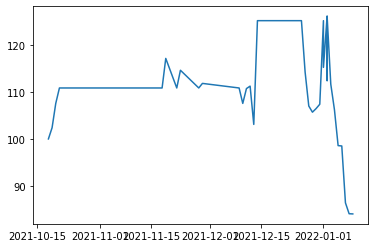

In [29]:
api = "alpha"
goods = a.sort_values("pv",ascending=False).head(10).iloc[0]
current_trades = t[(t["signal"]==goods["signal"].item())
                       & (t["req"]==goods["req"].item())
                        & (t["retrack_days"]==goods["retrack_days"].item())
                          
                  ]
current_trades.sort_values("sell_date",inplace=True)
if current_trades.index.size > 1:
    viz = []
    row = current_trades.iloc[0]
    pv = 100
    start_date = row["date"]
    symbol = row["symbol"]
    amount = float(pv/row["buy_price"])
    end_date = row["sell_date"]
    pv2 = amount * row["sell_price"]
    viz.append({"date":start_date,"crypto":symbol,"amount":amount})
    viz.append({"date":end_date,"crypto":symbol,"amount":amount})
    track_date = start_date
    while track_date < end_date - timedelta(days=1):
        track_date = track_date + timedelta(days=1)
        viz.append({"date":track_date,"crypto":symbol,"amount":amount})
    for i in range(1,current_trades.index.size-1):
        row = current_trades.iloc[i]
        symbol = current_trades.iloc[i]["symbol"]
        start_date = row["date"]
        pv = pv2
        amount =  pv /row["buy_price"]
        viz.append({"date":start_date,"crypto":symbol,"amount":amount})
        track_date = start_date
        end_date = row["sell_date"]
        while track_date < end_date:
            track_date = track_date + timedelta(days=1)
            viz.append({"date":track_date,"crypto":symbol,"amount":amount})
        pv2 = amount * row["sell_price"]
        viz.append({"date":end_date,"crypto":symbol,"amount":amount})
    window = pd.DataFrame(viz)
    example = final.rename(columns={"symbol":"crypto"}).merge(window,how="left",on=["date","crypto"])
    example = example.dropna().sort_values("date")
    example["actual"] = example["amount"] * example["close"]
#     example["bench_delta"] = (example["btc"] - example["btc"].iloc[0]) / example["btc"].iloc[0]
    example["actual_delta"] = (example["actual"] - example["actual"].iloc[0]) / example["actual"].iloc[0]
    plt.plot(example["date"],example["actual"])
#         plt.plot(example["date"],example["bench_delta"])
plt.show()

In [30]:
symbol_analysis = []
for symbol in current_trades["symbol"].unique():
    symbol_trades = current_trades[current_trades["symbol"]==symbol]
    trades = symbol_trades.index.size
    initial = 1
    for delta in symbol_trades["delta"]:
        initial = initial * 1+delta
    symbol_return = initial
    symbol_trades["hpr"] = symbol_trades["sell_date"] - symbol_trades["date"]
    symbol_trades["days"] = [x.days for x in symbol_trades["hpr"]]
    symbol_analysis.append({"symbol":symbol,"return":initial,"trades":trades,"hpr":symbol_trades["days"].mean()})

In [31]:
pd.DataFrame(symbol_analysis).sort_values("return",ascending=False)

,symbol,return,trades,hpr
4,doge,1.128918,2,3.0
0,avax,1.108147,1,3.0
2,ltc,1.000000,1,1.0
3,btc,1.000000,1,1.0
5,luna,0.672123,1,14.0
1,dot,0.651523,2,20.0
